In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3182,6568-POCUI,Female,0,Yes,No,45,Yes,No,Fiber optic,No,...,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),95.20,4285.8,No
2494,1596-BBVTG,Male,0,No,No,35,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Credit card (automatic),75.35,2636.05,Yes
4675,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
4158,8874-EJNSR,Male,0,Yes,Yes,39,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.20,987.95,No
2975,3043-TYBNO,Male,0,No,No,3,Yes,No,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Mailed check,60.65,196.9,No


In [10]:
df.drop('customerID', axis='columns', inplace=True)

In [11]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [14]:
pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [15]:
df[pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [16]:
df.shape

(7043, 20)

In [17]:
df.iloc[488].TotalCharges

' '

In [18]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [19]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [20]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [21]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\Nana Kwame\AppData\Local\Temp\ipykernel_2840\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [22]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [23]:
df1[df1.Churn == 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


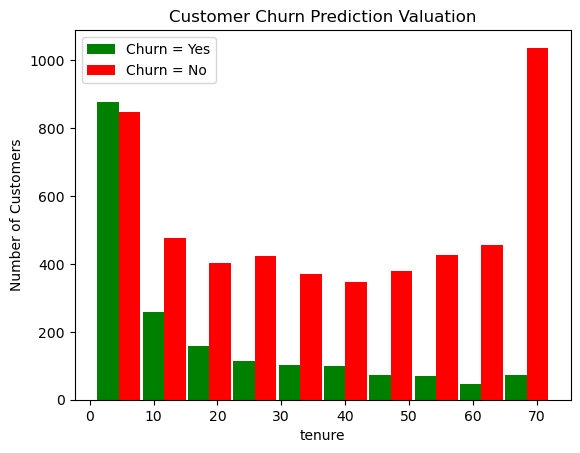

In [24]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Valuation")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color = ['green', 'red'], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

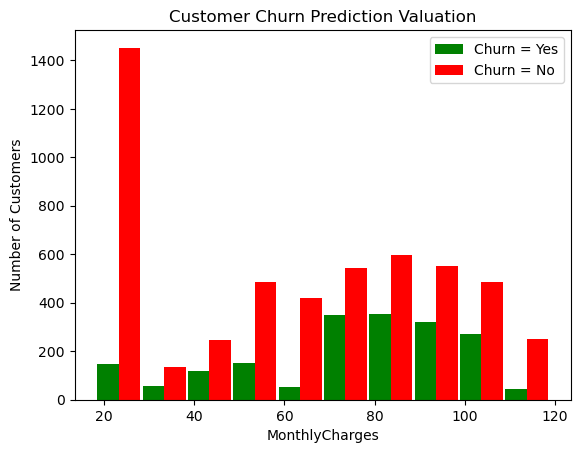

In [25]:
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Valuation")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color = ['green', 'red'], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

In [26]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtype == 'object':
            print(f'{column}: {df[column].unique()}')

In [27]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [28]:
df1.replace('No phone service','No',inplace = True)
df1.replace('No internet service','No',inplace = True)

C:\Users\Nana Kwame\AppData\Local\Temp\ipykernel_2840\3535595429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace = True)
C:\Users\Nana Kwame\AppData\Local\Temp\ipykernel_2840\3535595429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace = True)


In [29]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [30]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes' : 1, 'No' : 0}, inplace = True)

C:\Users\Nana Kwame\AppData\Local\Temp\ipykernel_2840\1450866078.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes' : 1, 'No' : 0}, inplace = True)


In [31]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [27]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [32]:
df1['gender'].replace({'Female': 1, 'Male': 0}, inplace = True)

C:\Users\Nana Kwame\AppData\Local\Temp\ipykernel_2840\2106580935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female': 1, 'Male': 0}, inplace = True)


In [33]:
df1.gender.unique()

array([1, 0], dtype=int64)

One hot encoding for categorical columns

In [34]:
df2 = pd.get_dummies(data=df1, columns = ['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [35]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1223,1,0,0,0,2,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
3797,0,0,1,0,43,1,1,1,0,1,...,True,False,False,False,True,False,False,False,True,False
5446,0,0,0,0,1,1,0,0,0,0,...,False,False,True,True,False,False,False,False,False,True
5762,0,1,1,0,30,1,1,1,1,1,...,False,True,False,True,False,False,True,False,False,False
2090,1,0,1,1,48,0,0,0,0,0,...,True,False,False,True,False,False,False,True,False,False


In [36]:
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'], dtype=np.uint64)
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6643,1,1,1,0,3,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
1638,1,0,1,1,68,1,1,0,1,1,...,0,1,0,0,0,1,0,1,0,0
6155,0,0,1,0,5,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
5623,0,0,0,0,40,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
500,0,0,0,0,34,1,1,1,1,1,...,0,1,0,0,1,0,0,1,0,0


In [40]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                         uint64
InternetService_Fiber optic                 uint64
InternetService_No             

In [37]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [38]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

Train Test Split

In [39]:
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [44]:
X_train.shape

(5625, 26)

In [45]:
X_test.shape

(1407, 26)

In [46]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [47]:
len(X_train.columns)

26

Building Artificial Neural Network (ANN) in tensorflow/keras

In [1]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metada

   -- ------------------------------------ 16.2/284.2 MB 338.1 kB/s eta 0:13:13
   -- ------------------------------------ 16.3/284.2 MB 338.3 kB/s eta 0:13:12
   -- ------------------------------------ 16.3/284.2 MB 339.3 kB/s eta 0:13:10
   -- ------------------------------------ 16.4/284.2 MB 337.4 kB/s eta 0:13:14
   -- ------------------------------------ 16.5/284.2 MB 338.3 kB/s eta 0:13:12
   -- ------------------------------------ 16.5/284.2 MB 338.3 kB/s eta 0:13:12
   -- ------------------------------------ 16.6/284.2 MB 337.2 kB/s eta 0:13:14
   -- ------------------------------------ 16.6/284.2 MB 340.4 kB/s eta 0:13:06
   -- ------------------------------------ 16.7/284.2 MB 341.9 kB/s eta 0:13:03
   -- ------------------------------------ 16.8/284.2 MB 342.2 kB/s eta 0:13:02
   -- ------------------------------------ 16.8/284.2 MB 342.2 kB/s eta 0:13:02
   -- ------------------------------------ 16.8/284.2 MB 342.2 kB/s eta 0:13:02
   -- ----------------------------------

   -------------- ----------------------- 108.9/284.2 MB 244.1 kB/s eta 0:11:59
   -------------- ----------------------- 108.9/284.2 MB 244.1 kB/s eta 0:11:59
   -------------- ----------------------- 108.9/284.2 MB 244.1 kB/s eta 0:11:59
   -------------- ----------------------- 108.9/284.2 MB 244.1 kB/s eta 0:11:59
   -------------- ----------------------- 108.9/284.2 MB 240.8 kB/s eta 0:12:09
   -------------- ----------------------- 108.9/284.2 MB 240.3 kB/s eta 0:12:10
   -------------- ----------------------- 108.9/284.2 MB 240.3 kB/s eta 0:12:10
   -------------- ----------------------- 108.9/284.2 MB 240.3 kB/s eta 0:12:10
   -------------- ----------------------- 108.9/284.2 MB 240.3 kB/s eta 0:12:10
   -------------- ----------------------- 108.9/284.2 MB 237.4 kB/s eta 0:12:19
   -------------- ----------------------- 108.9/284.2 MB 237.7 kB/s eta 0:12:18
   -------------- ----------------------- 108.9/284.2 MB 237.2 kB/s eta 0:12:19
   -------------- ----------------------

   -------------- ----------------------- 111.9/284.2 MB 151.2 kB/s eta 0:19:00
   -------------- ----------------------- 111.9/284.2 MB 151.2 kB/s eta 0:19:00
   -------------- ----------------------- 111.9/284.2 MB 150.8 kB/s eta 0:19:03
   -------------- ----------------------- 111.9/284.2 MB 150.8 kB/s eta 0:19:03
   -------------- ----------------------- 111.9/284.2 MB 150.8 kB/s eta 0:19:03
   -------------- ----------------------- 111.9/284.2 MB 150.8 kB/s eta 0:19:03
   -------------- ----------------------- 112.0/284.2 MB 152.5 kB/s eta 0:18:49
   -------------- ----------------------- 112.0/284.2 MB 152.5 kB/s eta 0:18:49
   -------------- ----------------------- 112.0/284.2 MB 152.8 kB/s eta 0:18:48
   -------------- ----------------------- 112.0/284.2 MB 152.8 kB/s eta 0:18:48
   -------------- ----------------------- 112.0/284.2 MB 152.5 kB/s eta 0:18:50
   -------------- ----------------------- 112.0/284.2 MB 152.5 kB/s eta 0:18:50
   -------------- ----------------------

   --------------- ---------------------- 112.9/284.2 MB 135.6 kB/s eta 0:21:04
   --------------- ---------------------- 112.9/284.2 MB 135.6 kB/s eta 0:21:04
   --------------- ---------------------- 112.9/284.2 MB 136.2 kB/s eta 0:20:58
   --------------- ---------------------- 112.9/284.2 MB 136.2 kB/s eta 0:20:58
   --------------- ---------------------- 112.9/284.2 MB 136.2 kB/s eta 0:20:58
   --------------- ---------------------- 112.9/284.2 MB 136.1 kB/s eta 0:20:59
   --------------- ---------------------- 112.9/284.2 MB 136.3 kB/s eta 0:20:57
   --------------- ---------------------- 112.9/284.2 MB 136.3 kB/s eta 0:20:57
   --------------- ---------------------- 112.9/284.2 MB 136.3 kB/s eta 0:20:57
   --------------- ---------------------- 112.9/284.2 MB 136.3 kB/s eta 0:20:57
   --------------- ---------------------- 113.0/284.2 MB 136.6 kB/s eta 0:20:54
   --------------- ---------------------- 113.0/284.2 MB 136.6 kB/s eta 0:20:54
   --------------- ---------------------

   -------------------- ----------------- 156.5/284.2 MB 274.5 kB/s eta 0:07:46
   -------------------- ----------------- 156.5/284.2 MB 273.6 kB/s eta 0:07:47
   -------------------- ----------------- 156.5/284.2 MB 273.6 kB/s eta 0:07:47
   -------------------- ----------------- 156.5/284.2 MB 274.1 kB/s eta 0:07:46
   -------------------- ----------------- 156.5/284.2 MB 274.1 kB/s eta 0:07:46
   -------------------- ----------------- 156.6/284.2 MB 273.6 kB/s eta 0:07:47
   -------------------- ----------------- 156.6/284.2 MB 273.5 kB/s eta 0:07:47
   -------------------- ----------------- 156.6/284.2 MB 273.1 kB/s eta 0:07:48
   -------------------- ----------------- 156.6/284.2 MB 273.3 kB/s eta 0:07:47
   -------------------- ----------------- 156.6/284.2 MB 273.3 kB/s eta 0:07:47
   -------------------- ----------------- 156.6/284.2 MB 273.3 kB/s eta 0:07:47
   -------------------- ----------------- 156.7/284.2 MB 273.6 kB/s eta 0:07:47
   -------------------- ----------------

   --------------------- ---------------- 161.4/284.2 MB 268.5 kB/s eta 0:07:38
   --------------------- ---------------- 161.4/284.2 MB 269.0 kB/s eta 0:07:37
   --------------------- ---------------- 161.4/284.2 MB 269.0 kB/s eta 0:07:37
   --------------------- ---------------- 161.5/284.2 MB 270.3 kB/s eta 0:07:34
   --------------------- ---------------- 161.5/284.2 MB 270.3 kB/s eta 0:07:34
   --------------------- ---------------- 161.5/284.2 MB 269.7 kB/s eta 0:07:35
   --------------------- ---------------- 161.6/284.2 MB 270.1 kB/s eta 0:07:35
   --------------------- ---------------- 161.6/284.2 MB 270.8 kB/s eta 0:07:33
   --------------------- ---------------- 161.6/284.2 MB 270.8 kB/s eta 0:07:33
   --------------------- ---------------- 161.6/284.2 MB 270.8 kB/s eta 0:07:33
   --------------------- ---------------- 161.7/284.2 MB 275.0 kB/s eta 0:07:26
   --------------------- ---------------- 161.7/284.2 MB 275.0 kB/s eta 0:07:26
   --------------------- ---------------

   ---------------------- --------------- 166.8/284.2 MB 331.3 kB/s eta 0:05:55
   ---------------------- --------------- 166.8/284.2 MB 331.1 kB/s eta 0:05:55
   ---------------------- --------------- 166.8/284.2 MB 331.1 kB/s eta 0:05:55
   ---------------------- --------------- 166.9/284.2 MB 331.6 kB/s eta 0:05:54
   ---------------------- --------------- 166.9/284.2 MB 333.0 kB/s eta 0:05:53
   ---------------------- --------------- 167.0/284.2 MB 334.0 kB/s eta 0:05:51
   ---------------------- --------------- 167.0/284.2 MB 333.8 kB/s eta 0:05:52
   ---------------------- --------------- 167.0/284.2 MB 336.3 kB/s eta 0:05:49
   ---------------------- --------------- 167.1/284.2 MB 337.4 kB/s eta 0:05:48
   ---------------------- --------------- 167.1/284.2 MB 337.4 kB/s eta 0:05:48
   ---------------------- --------------- 167.1/284.2 MB 338.6 kB/s eta 0:05:46
   ---------------------- --------------- 167.1/284.2 MB 339.1 kB/s eta 0:05:46
   ---------------------- --------------

   ----------------------------- -------- 221.2/284.2 MB 270.5 kB/s eta 0:03:53
   ----------------------------- -------- 221.2/284.2 MB 270.6 kB/s eta 0:03:53
   ----------------------------- -------- 221.3/284.2 MB 270.7 kB/s eta 0:03:53
   ----------------------------- -------- 221.3/284.2 MB 270.7 kB/s eta 0:03:53
   ----------------------------- -------- 221.3/284.2 MB 268.2 kB/s eta 0:03:55
   ----------------------------- -------- 221.3/284.2 MB 268.7 kB/s eta 0:03:55
   ----------------------------- -------- 221.3/284.2 MB 268.7 kB/s eta 0:03:55
   ----------------------------- -------- 221.3/284.2 MB 267.9 kB/s eta 0:03:55
   ----------------------------- -------- 221.3/284.2 MB 268.1 kB/s eta 0:03:55
   ----------------------------- -------- 221.3/284.2 MB 268.1 kB/s eta 0:03:55
   ----------------------------- -------- 221.3/284.2 MB 267.6 kB/s eta 0:03:55
   ----------------------------- -------- 221.3/284.2 MB 267.6 kB/s eta 0:03:55
   ----------------------------- -------

   ------------------------------ ------- 230.4/284.2 MB 279.7 kB/s eta 0:03:13
   ------------------------------ ------- 230.4/284.2 MB 279.7 kB/s eta 0:03:13
   ------------------------------ ------- 230.5/284.2 MB 279.9 kB/s eta 0:03:12
   ------------------------------ ------- 230.5/284.2 MB 279.8 kB/s eta 0:03:12
   ------------------------------ ------- 230.5/284.2 MB 279.8 kB/s eta 0:03:12
   ------------------------------ ------- 230.5/284.2 MB 279.8 kB/s eta 0:03:12
   ------------------------------ ------- 230.5/284.2 MB 279.8 kB/s eta 0:03:12
   ------------------------------ ------- 230.6/284.2 MB 288.3 kB/s eta 0:03:06
   ------------------------------ ------- 230.6/284.2 MB 288.3 kB/s eta 0:03:06
   ------------------------------ ------- 230.6/284.2 MB 288.3 kB/s eta 0:03:06
   ------------------------------ ------- 230.6/284.2 MB 288.3 kB/s eta 0:03:06
   ------------------------------ ------- 230.6/284.2 MB 288.3 kB/s eta 0:03:06
   ------------------------------ ------

   ------------------------------- ------ 238.4/284.2 MB 300.7 kB/s eta 0:02:33
   ------------------------------- ------ 238.5/284.2 MB 301.0 kB/s eta 0:02:32
   ------------------------------- ------ 238.5/284.2 MB 301.4 kB/s eta 0:02:32
   ------------------------------- ------ 238.5/284.2 MB 300.7 kB/s eta 0:02:32
   ------------------------------- ------ 238.5/284.2 MB 300.7 kB/s eta 0:02:32
   ------------------------------- ------ 238.5/284.2 MB 300.9 kB/s eta 0:02:32
   ------------------------------- ------ 238.5/284.2 MB 299.7 kB/s eta 0:02:33
   ------------------------------- ------ 238.5/284.2 MB 299.7 kB/s eta 0:02:33
   ------------------------------- ------ 238.5/284.2 MB 299.7 kB/s eta 0:02:33
   ------------------------------- ------ 238.6/284.2 MB 298.8 kB/s eta 0:02:33
   ------------------------------- ------ 238.6/284.2 MB 298.8 kB/s eta 0:02:33
   ------------------------------- ------ 238.6/284.2 MB 298.8 kB/s eta 0:02:33
   ------------------------------- -----

   -------------- ------------------------- 2.0/5.5 MB 300.8 kB/s eta 0:00:12
   -------------- ------------------------- 2.0/5.5 MB 300.8 kB/s eta 0:00:12
   -------------- ------------------------- 2.0/5.5 MB 300.4 kB/s eta 0:00:12
   -------------- ------------------------- 2.0/5.5 MB 300.7 kB/s eta 0:00:12
   -------------- ------------------------- 2.0/5.5 MB 300.7 kB/s eta 0:00:12
   -------------- ------------------------- 2.0/5.5 MB 301.0 kB/s eta 0:00:12
   -------------- ------------------------- 2.0/5.5 MB 301.0 kB/s eta 0:00:12
   -------------- ------------------------- 2.1/5.5 MB 300.6 kB/s eta 0:00:12
   --------------- ------------------------ 2.1/5.5 MB 299.4 kB/s eta 0:00:12
   --------------- ------------------------ 2.1/5.5 MB 299.4 kB/s eta 0:00:12
   --------------- ------------------------ 2.1/5.5 MB 301.9 kB/s eta 0:00:12
   --------------- ------------------------ 2.1/5.5 MB 301.9 kB/s eta 0:00:12
   --------------- ------------------------ 2.1/5.5 MB 300.1 kB/

   ------------------------------------- -- 5.2/5.5 MB 209.5 kB/s eta 0:00:02
   ------------------------------------- -- 5.2/5.5 MB 209.5 kB/s eta 0:00:02
   ------------------------------------- -- 5.2/5.5 MB 209.1 kB/s eta 0:00:02
   ------------------------------------- -- 5.2/5.5 MB 209.1 kB/s eta 0:00:02
   ------------------------------------- -- 5.2/5.5 MB 209.1 kB/s eta 0:00:02
   ------------------------------------- -- 5.2/5.5 MB 209.1 kB/s eta 0:00:02
   ------------------------------------- -- 5.2/5.5 MB 209.1 kB/s eta 0:00:02
   -------------------------------------- - 5.2/5.5 MB 208.3 kB/s eta 0:00:02
   -------------------------------------- - 5.2/5.5 MB 208.3 kB/s eta 0:00:02
   -------------------------------------- - 5.2/5.5 MB 208.3 kB/s eta 0:00:02
   -------------------------------------- - 5.2/5.5 MB 208.3 kB/s eta 0:00:02
   -------------------------------------- - 5.3/5.5 MB 207.1 kB/s eta 0:00:02
   -------------------------------------- - 5.3/5.5 MB 207.1 kB/

In [2]:
import sys

In [3]:
sys.executable

'C:\\Users\\Nana Kwame\\anaconda3\\anaconda30\\python.exe'

In [4]:
import tensorflow as tf

In [5]:
from tensorflow import keras

In [6]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape(26,), activation = 'relu')
    keras.layers.Dense(1, activation = 'sigmoid'),
])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1405926870.py, line 2)

In [49]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 7s 8ms/step - loss: 0.5573 - accuracy: 0.7010
Epoch 2/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4242 - accuracy: 0.7982
Epoch 3/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4173 - accuracy: 0.8037
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4141 - accuracy: 0.8021
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4117 - accuracy: 0.8062
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4097 - accuracy: 0.8091
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4086 - accuracy: 0.8073
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4067 - accuracy: 0.8091
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4069 - accuracy: 0.8101
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4051 - accura

176/176 [==============================] - 1s 4ms/step - loss: 0.3546 - accuracy: 0.8341
Epoch 82/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3540 - accuracy: 0.8331
Epoch 83/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3529 - accuracy: 0.8368
Epoch 84/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3529 - accuracy: 0.8327
Epoch 85/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3540 - accuracy: 0.8364
Epoch 86/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3517 - accuracy: 0.8354
Epoch 87/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3529 - accuracy: 0.8338
Epoch 88/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3523 - accuracy: 0.8352
Epoch 89/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3514 - accuracy: 0.8357
Epoch 90/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3528 - accuracy: 

In [50]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 3s 9ms/step - loss: 0.4913 - accuracy: 0.7697


[0.4913195073604584, 0.7697228193283081]

In [51]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 2s 9ms/step


array([[0.2771373 ],
       [0.7815131 ],
       [0.00721874],
       [0.8315654 ],
       [0.29291528]], dtype=float32)

In [55]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [53]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [54]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 1]

In [56]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       999
           1       0.64      0.48      0.55       408

    accuracy                           0.77      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.76      0.77      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

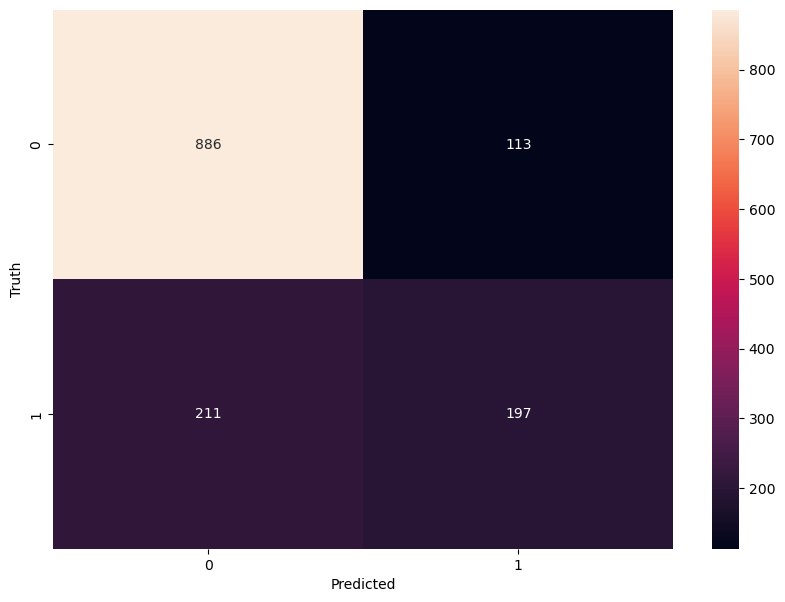

In [57]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuracy

In [60]:
round((886+197)/(886+197+113+211),2)

0.77

Precision for 0 class

In [61]:
round(886/(886+211), 2)

0.81

Precision for 1 class

In [65]:
round(197/(113+197), 2)

0.64

Recall for 0 class

In [66]:
round(886/(886+113), 2)

0.89

Recall for 1 class

In [68]:
round(197/(211+197), 2)

0.48